In [26]:
import numpy
import pandas

import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [ ]:
seed = 7
numpy.random.seed(seed)
# loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
# normalizing inputs
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
classes = y_test.shape[1]
classes


10

In [ ]:
# Creating the model using Sequential Neural Network
model = Sequential() 
#Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) 
#Dropout layer at 20%
model.add(Dropout(0.2)) 
#Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
#Max Pool layer with size 2×2
model.add(MaxPooling2D(pool_size=(2, 2))) 
#Flatten layer
model.add(Flatten()) 
#Fully connected layer with 512 units and a rectifier activation function
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 50%
model.add(Dropout(0.5)) 
#Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(classes, activation='softmax')) 


In [ ]:
# Compiling the model
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #Compiling the Model
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)              

In [25]:
# Fitting the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Epoch 1/3
1563/1563 [==============================] - 250s 160ms/step - loss: 1.8872 - accuracy: 0.3144 - val_loss: 1.4510 - val_accuracy: 0.4902
Epoch 2/3
1563/1563 [==============================] - 244s 156ms/step - loss: 1.4490 - accuracy: 0.4785 - val_loss: 1.3335 - val_accuracy: 0.5251
Epoch 3/3
1563/1563 [==============================] - 255s 163ms/step - loss: 1.3519 - accuracy: 0.5159 - val_loss: 1.2661 - val_accuracy: 0.5458


In [27]:
#evaluating model
scores = model.evaluate(X_test, y_test, verbose=0)
#Accuracy & loss evaluation
print("Accuracy of model before adding layers: %.2f%%" % (scores[1]*100))
#Saving the model
model.save('./model' + '.h5') 


Accuracy of model before adding layers: 54.58%


In [29]:
# Create the model using sequential Neural Network
model_1 = Sequential() 
# Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model_1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%
model_1.add(Dropout(0.2))
#Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model_1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
#Max Pool layer with size 2×2
model_1.add(MaxPooling2D(pool_size=(2, 2))) 
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model_1.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) 
# Dropout layer at 20%
model_1.add(Dropout(0.2))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
#Max Pool layer with size 2×2
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model_1.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) 
#Dropout layer at 20%
model_1.add(Dropout(0.2))
#Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function
model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
#Max Pool layer with size 2×2
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten layer
model_1.add(Flatten())
#Dropout layer at 20%
model_1.add(Dropout(0.2)) 
#Fully connected layer with 1024 units and a rectifier activation function
model_1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
#Dropout layer at 20%
model_1.add(Dropout(0.2))
#Fully connected layer with 512 units and a rectifier activation function
model_1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%
model_1.add(Dropout(0.2))
#Fully connected output layer with 10 units and a Softmax activation function
model_1.add(Dense(num_classes, activation='softmax'))


In [34]:
# Compiling model
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)       

In [35]:
# Fit the model
history_1=model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Epoch 1/3
1563/1563 [==============================] - 498s 318ms/step - loss: 2.0580 - accuracy: 0.2350 - val_loss: 1.6690 - val_accuracy: 0.4058
Epoch 2/3
1563/1563 [==============================] - 495s 317ms/step - loss: 1.5920 - accuracy: 0.4184 - val_loss: 1.4675 - val_accuracy: 0.4758
Epoch 3/3
1563/1563 [==============================] - 486s 311ms/step - loss: 1.4674 - accuracy: 0.4642 - val_loss: 1.4178 - val_accuracy: 0.4791


In [36]:
# Evaluation of the model
scores_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Accuracy of model_1: %.2f%%" % (scores_1[1]*100))


Accuracy of model_1: 47.91%


1. Did the performance change?

In [48]:
print("Accuracy of model before adding layers: %.2f%%" % (scores[1]*100))
print("Accuracy of model after adding layers: %.2f%%" % (scores_1[1]*100))


Accuracy of model before adding layers: 54.58%
Accuracy of model after adding layers: 47.91%


2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4 images to check whether or not the model has predicted correctly.

In [47]:
import pandas as pd
import numpy as np
pred = pd.DataFrame()
image_id = []
for i in range(len(X_test[0:4])):
    i = i + 1
    image_id.append(i)
pred["Image_Id"] = image_id
pred["Image_Label"] = model.predict_classes(X_test[0:4], verbose=0)
print(pred.head())

arr  = np.array(y_test[0:4])
print('Actual labels for images: {0}'.format(np.argmax(arr, axis=1)))


   Image_Id  Image_Label
0         1            3
1         2            1
2         3            8
3         4            0
Actual labels for images: [3 8 8 0]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3. Visualize Loss and Accuracy using the history object

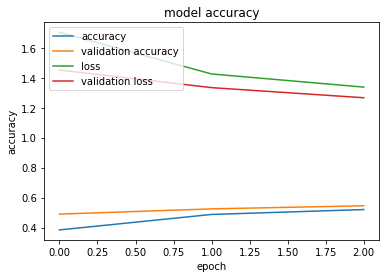

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()


Bonus: Program the question 2 using the saved model (.h5 model)

In [46]:
# using saved model
model_2 = keras.models.load_model('./model.h5')
pred = pd.DataFrame()
image_id = []
for i in range(len(X_test[0:4])):
    i = i + 1
    image_id.append(i)
pred["Image_Id"] = image_id
pred["Image_Label"] = model_2.predict_classes(X_test[0:4], verbose=0)
print(pred.head())

arr  = np.array(y_test[0:4])
print('Actual labels for images: {0}'.format(np.argmax(arr, axis=1)))


   Image_Id  Image_Label
0         1            3
1         2            1
2         3            8
3         4            0
Actual labels for images: [3 8 8 0]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
